# 1. Set-up
- Import libraries
- Define directories
- Split arrays into single, binary and weird

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as f
from os import listdir

In [3]:
path = '/home/puck/documents/brp/data' #puck
#path = r'C:\Users\joepn\OneDrive\Documenten\BRP\data' #joep

In [4]:
#The images containing weird artifacts that make them useless
weird_names = np.array(['2MASSJ11320835-5803199', '2MASSJ12041439-6418516', 
                        '2MASSJ12123577-5520273', '2MASSJ12192161-6454101', 
                        '2MASSJ12205449-6457242', '2MASSJ12472196-6808397',
                        '2MASSJ12582559-7028490', '2MASSJ13032904-4723160',])

#2MASSJ13032904-4723160 is star without flux image

In [5]:
#The binaries we found in our initial search
bin1 = np.array(['2MASSJ11555771-5254008', '2MASSJ12560830-6926539', 
                 '2MASSJ13015435-4249422', '2MASSJ13130714-4537438', 
                 'CD-43_3604', 'CVSO_751', 'Gaia_EDR3_3008386787098934144',
                 'HD_283629', 'HD_284266', 'HD_286179', 'UCAC4_454-011718', 
                 'UCAC4_475-014428', 'UCAC4_495-030196','UCAC4_501-011878'])

#The binaries we found in our second searcg
bin2 = np.array(['2MASSJ10065573-6352086','2MASSJ11272881-3952572',
                 '2MASSJ11445217-6438548','2MASSJ11452016-5749094',
                 '2MASSJ12163007-6711477','2MASSJ12185802-5737191',
                 '2MASSJ12210808-5212226','2MASSJ12234012-5616325',
                 '2MASSJ13055087-5304181','2MASSJ13103245-4817036',
                 '2MASSJ13174687-4456534','2MASSJ13335481-6536414',
                 'CoRoT_102718810','Gaia_EDR3_3014970387847972096',
                 'IRAS_08131-4432','RX_J2302.6+0034','UCAC4_127-038351',
                 'UCAC4_134-015937','UCAC4_406-011818','UCAC4_461-018326',
                 'UCAC4_482-118442','UCAC4_496-013657','UCAC4_519-042115',
                 'V1319_TAU'])

bin_names = np.append(bin1, bin2)

In [6]:
bin_wispit = np.array(['CoRoT_102718810','Gaia_EDR3_3014970387847972096',
                     'IRAS_08131-4432','RX_J2302.6+0034','UCAC4_127-038351',
                     'UCAC4_134-015937','UCAC4_406-011818','UCAC4_461-018326',
                     'UCAC4_482-118442','UCAC4_496-013657','UCAC4_519-042115',
                     'V1319_TAU','CD-43_3604', 'CVSO_751', 'Gaia_EDR3_3008386787098934144',
                     'HD_283629', 'HD_284266', 'HD_286179', 'UCAC4_454-011718', 
                     'UCAC4_475-014428', 'UCAC4_495-030196','UCAC4_501-011878'])

bin_yses = np.array(['2MASSJ10065573-6352086','2MASSJ11272881-3952572',
                     '2MASSJ11445217-6438548','2MASSJ11452016-5749094',
                     '2MASSJ12163007-6711477','2MASSJ12185802-5737191',
                     '2MASSJ12210808-5212226','2MASSJ12234012-5616325',
                     '2MASSJ13055087-5304181','2MASSJ13103245-4817036',
                     '2MASSJ13174687-4456534','2MASSJ13335481-6536414',
                     '2MASSJ11555771-5254008','2MASSJ12560830-6926539',
                     '2MASSJ13015435-4249422','2MASSJ13130714-4537438',])

In [7]:
sin_wispit = np.array(['2MASS_J05162151+1147472', '2MASS_J05264348+0143538',
                       '2MASS_J06145339+0003000', 'GAIA_DR3_5854897321965963264',
                       'HD_285372', 'HD_285579', 'HD_285778','HD_285840',
                       'J_618A', 'NSVS_14407747', 'UCAC4_141-082231', 
                       'UCAC4_200-015587', 'UCAC4_280-010722', 'UCAC4_312-058127',
                       'UCAC4_319-026529', 'UCAC4_446-032370', 'UCAC4_537-015077',
                       'V_V1267_CEN', 'V_V1346_Tau', 'V_V826_Tau'])

sin_yses = np.array(['2MASSJ10560422-6152054', '2MASSJ11175186-6402056',
                     '2MASSJ11275535-6626046', '2MASSJ11454278-5739285',
                     '2MASSJ12065276-5044463', '2MASSJ12090225-5120410',
                     '2MASSJ12101065-4855476', '2MASSJ12113142-5816533',
                     '2MASSJ12121119-4950081', '2MASSJ12160114-5614068',
                     '2MASSJ12164023-7007361', '2MASSJ12195938-5018404',
                     '2MASSJ12210499-7116493', '2MASSJ12220430-4841248',
                     '2MASSJ12240975-6003416', '2MASSJ12264842-5215070',
                     '2MASSJ12302957-5222269', '2MASSJ12333381-5714066',
                     '2MASSJ12361767-5042421', '2MASSJ12365895-5412178',
                     '2MASSJ12374883-5209463', '2MASSJ12383556-5916438',
                     '2MASSJ12391404-5454469', '2MASSJ12393796-5731406',
                     '2MASSJ12404664-5211046', '2MASSJ12405458-5031550',
                     '2MASSJ12454884-5410583', '2MASSJ12480778-4439167',
                     '2MASSJ12505143-5156353', '2MASSJ12510556-5253121',
                     '2MASSJ13015069-5304581', '2MASSJ13064012-5159386',
                     '2MASSJ13065439-4541313', '2MASSJ13095880-4527388',
                     '2MASSJ13121764-5508258', '2MASSJ13233587-4718467',
                     '2MASSJ13251211-6456207', '2MASSJ13334410-6359345',
                     '2MASSJ13343188-4209305', '2MASSJ13354082-4818124',
                     '2MASSJ13380596-4344564', '2MASSJ13381128-5214251',
                     '2MASSJ13444279-6347495', '2MASSJ13455599-5222255'])

sin_names = np.append(sin_wispit, sin_yses)

In [8]:
#Array containing the names of all stars
all_stars = np.array(sorted(listdir(path)))

# 2. Retrieve the data 
- Write a function which retrieves the name of the star and the date of observation
- Write a function to retrieve the data of one star
- Write a function which combines all this data into one array

In [9]:
def star_info(star_list, idx):
    ''' Returns the name of the star and date of observation as a tuple. '''
    return star_list[idx], listdir(f'{path}/{star_list[idx]}')[0]

In [10]:
def star_data(star_list):
    ''' Returns the flux data of the stars in star_list in a 3d np.array. '''
    arr = np.empty((len(star_list), 1024, 1024))
    for i in range(len(star_list)):
        name, date = star_info(star_list, i)
        with f.open(f'{path}/{name}/{date}/B_H/calibration/flux/' + 
                    f'{name}_{date}_cube_flux_processed_right.fits') as hdul:
            data = hdul[0].data
        arr[i] = data[0]
    return arr

In [11]:
sin_data = star_data(sin_names)

# 3. Data reduction
- Circle of radius 100 pixels around center
- 200 x 200 pixelsaround center

In [12]:
def mask_but_center(arr):
    ''' Masks everything but the area with radius r in a circle around the center. '''
    x = y = np.linspace(-(len(arr))/2, (len(arr))/2, len(arr))
    x_grid, y_grid = np.meshgrid(x, y)
    r_grid = np.sqrt(x_grid**2 + y_grid**2)
    arr[r_grid > 100] = None 
    return arr

def normalize(arr):
    ''' Normalizes the array '''
    arr = np.array(arr,dtype=np.float64)
    return arr/np.nanmax(arr)

def data_reduction(arr):
    ''' Masks and then normalizes an array with one image. '''
    mask_arr = mask_but_center(arr)
    norm_arr = normalize(mask_arr)
    return norm_arr

In [13]:
#Array with all the single stars but then masked and normalized
sin_data_copy = sin_data.copy()
sin_clb = np.array([data_reduction(sin_data_copy[i]) for i in range(len(sin_names))])

# 4. Finding the perfect median star
- Cut out an aperture around the star
- Calculate the RMS of each little square to determine the noise
- Combine all these RMS in an array and sort them from best to worst
- Write a function that calculates the median of an array of stars
- Write a function 

In [14]:
def mask_aperture(arr):
    ''' Picks out a ring between radius 20 and 30 around the star and returns this.  '''
    x = y = np.linspace(-(len(arr))/2, (len(arr))/2, len(arr))
    x_grid, y_grid = np.meshgrid(x, y)
    r_grid = np.sqrt(x_grid**2 + y_grid**2)
    arr[r_grid > 50] = None 
    arr[r_grid < 30] = None
    return arr

def arr_sort_rms(arr):
    ''' Returns an array with indexes of the image with the best rms first and the worst rms last and
    returns the single star array sorted from best to worst rms. '''
    rms_arr = np.nanstd(arr, axis = (1, 2)) #gives an array with rms's for every aperture of every image
    idx = np.argsort(rms_arr) 
    return idx, arr[idx]

In [15]:
def median_image(sorted_arr):
    ''' Input an array sorted from best to worst rms. Returns a cube (med_cube) containing images where every ith 
    image is the median of the first i+1 images in the input array. rms_med_im contains the rms of these images.'''
    med_cube = np.zeros([sorted_arr.shape[0]-1, sorted_arr.shape[1], sorted_arr.shape[2]]) #Cube containing all images. 
    rms_med_im = np.zeros(sorted_arr.shape[0]-1)
    
    for i in range(2, len(sorted_arr)+1):
        print(f'N = {i}')
        N_im = sorted_arr[0:i]
        med = np.median(N_im, axis = 0)
        rms = np.nanstd(med)
        rms_med_im[i-2] = rms
        med_cube[i-2] = med
    
    return med_cube, rms_med_im

# YSES

In [15]:
yses_data = star_data(sin_yses)
yses_clb = np.array([data_reduction(yses_data[i]) for i in range(len(sin_yses))])
yses_aper = np.array([mask_aperture(yses_clb[i]) for i in range(len(sin_yses))])

In [16]:
idx_yses_sort, yses_sort = arr_sort_rms(yses_aper)

In [17]:
yses_med_cube, yses_rms_med = median_image(yses_sort)

N = 2
N = 3
N = 4
N = 5
N = 6
N = 7
N = 8
N = 9
N = 10
N = 11
N = 12
N = 13
N = 14
N = 15
N = 16
N = 17
N = 18
N = 19
N = 20
N = 21
N = 22
N = 23
N = 24
N = 25
N = 26
N = 27
N = 28
N = 29
N = 30
N = 31
N = 32
N = 33
N = 34
N = 35
N = 36
N = 37
N = 38
N = 39
N = 40
N = 41
N = 42
N = 43
N = 44


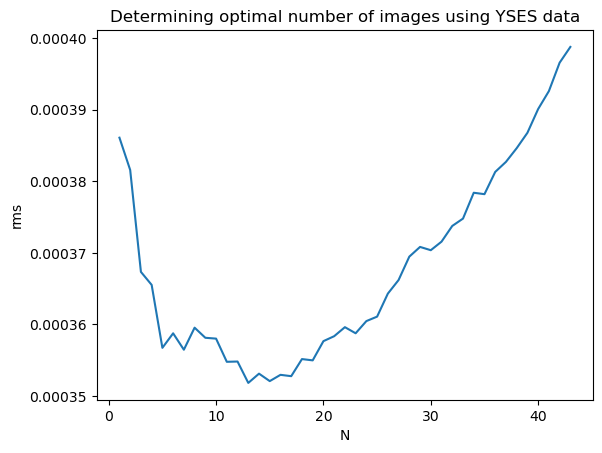

In [19]:
plt.figure()
plt.title('Determining optimal number of images using YSES data')
plt.plot(np.arange(1, len(yses_rms_med)+1), yses_rms_med)
plt.xlabel('N')
plt.ylabel('rms')
plt.savefig('YSES_RMS_image.pdf')

# WISPIT

In [20]:
wp_data = star_data(sin_wispit)
wp_clb = np.array([data_reduction(wp_data[i]) for i in range(len(sin_wispit))])
wp_aper = np.array([mask_aperture(wp_clb[i]) for i in range(len(sin_wispit))])

In [21]:
idx_wp_sort, wp_sort = arr_sort_rms(wp_aper)

In [22]:
wp_med_cube, wp_rms_med = median_image(wp_sort)

N = 2
N = 3
N = 4
N = 5
N = 6
N = 7
N = 8
N = 9
N = 10
N = 11
N = 12
N = 13
N = 14
N = 15
N = 16
N = 17
N = 18
N = 19
N = 20


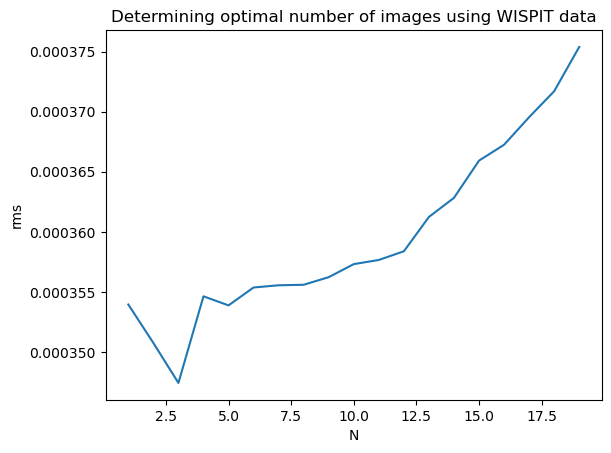

In [23]:
plt.figure()
plt.title('Determining optimal number of images using WISPIT data')
plt.plot(np.arange(1, len(wp_rms_med)+1), wp_rms_med)
plt.xlabel('N')
plt.ylabel('rms')
plt.savefig('WISPIT_RMS_image.pdf')

# YSES and WISPIT

In [16]:
sin_clb_copy = sin_clb.copy()
sin_aper = np.array([mask_aperture(sin_clb_copy[i]) for i in range(len(sin_names))])

In [17]:
idx_sin_sort, sin_sort = arr_sort_rms(sin_aper)

In [18]:
sin_med_cube, sin_rms_med = median_image(sin_sort)

N = 2
N = 3
N = 4
N = 5
N = 6
N = 7
N = 8
N = 9
N = 10
N = 11
N = 12
N = 13
N = 14
N = 15
N = 16
N = 17
N = 18
N = 19
N = 20
N = 21
N = 22
N = 23
N = 24
N = 25
N = 26
N = 27
N = 28
N = 29
N = 30
N = 31
N = 32
N = 33
N = 34
N = 35
N = 36
N = 37
N = 38
N = 39
N = 40
N = 41
N = 42
N = 43
N = 44
N = 45
N = 46
N = 47
N = 48
N = 49
N = 50
N = 51
N = 52
N = 53
N = 54
N = 55
N = 56
N = 57
N = 58
N = 59
N = 60
N = 61
N = 62
N = 63
N = 64


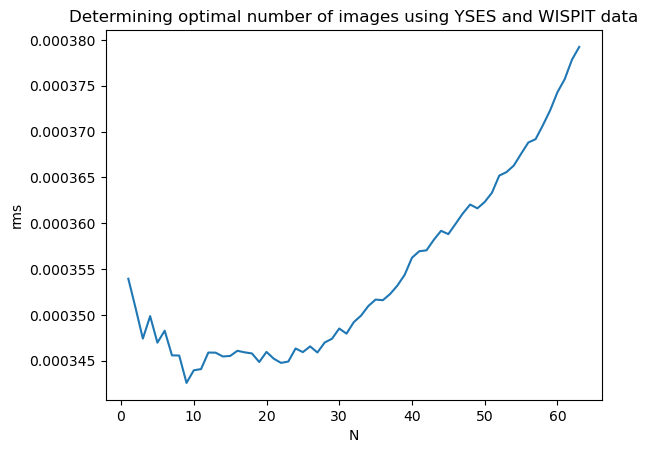

In [19]:
plt.figure()
plt.title('Determining optimal number of images using YSES and WISPIT data')
plt.plot(np.arange(1, len(sin_rms_med)+1), sin_rms_med)
plt.xlabel('N')
plt.ylabel('rms')
plt.savefig('ALL_RMS_image.pdf')

# 5. Subtract median star from test stars

In [ ]:
def subtract_star(im, med_st):
    ''' Subtract the median star from the image and images the results'''
    im = calibration(im, 100)
    dx = im - med_st
    return dx

In [ ]:
rest = subtract_star(star_data(0, single_stars), med_arr)
name, date = star_info(0, single_stars)
plt.title(f'{name}, {date}')
plt.imshow(rest)
plt.colorbar()
plt.xlim(400, 624)
plt.ylim(400, 624)
plt.show()

In [ ]:
for i in range(len(single_stars)):
    rest = subtract_star(star_data(i, single_stars), med_arr)
    name, date = star_info(i, single_stars)
#     plt.title(f'{name}, {date}')
#     plt.imshow(rest)
#     plt.colorbar()
#     plt.xlim(500, 524)
#     plt.ylim(500, 524)
#     plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(rest)
    plt.xlim(400, 624)
    plt.ylim(400, 624)

    plt.subplot(1,2,2)
    plt.imshow(rest)
    plt.colorbar()
    plt.xlim(500, 524)
    plt.ylim(500, 524)

    plt.suptitle(f'{name}, {date}')
    plt.show()

In [ ]:
subtract_star(star_data(path_sin, 1), med_arr)
name, date = star_info(path_sin, 1)
plt.title(f'{name}, {date}')
plt.imshow(rest)
plt.colorbar()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.show()

# .reg files
1. Want to open them
2. Want to be able to read them
3. Search for key word circle
4. Save x and y coordinate
    - Are all coordinates equally long? --> if not begin next at ,
    - Do not save radius too

In [15]:
def find_x_y_reg(file, loc_circle, sep):
    ''' Opens the .reg file and returns the x and y coordinate in the file. loc_circle is the number of the line
    where the information on the circle is stored and sep is the thing used for seperating the x and y coord. '''
    with open(file, 'rt') as reg:
        data_reg = reg.readlines()
        data_reg = data_reg[loc_circle]
    
    first, second = data_reg.find(sep), data_reg.rfind(sep)
    return float(data_reg[7:first]), float(data_reg[(first+1):second])

In [16]:
x, y = find_x_y_reg(f'data/{star}/{date}/{star}_{date}.reg', 3, ',')

NameError: name 'star' is not defined

In [ ]:
x